# Distances

For this example notebook, we'll need to install Ripser.py to create the persistence diagrams:
```
pip install Cython ripser
```

In [2]:
from sklearn import datasets
import persim
import persim.plot
import ripser
import matplotlib.pyplot as plt

In [3]:
data_clean = datasets.make_circles()[0]
data_noisy = datasets.make_circles(noise=0.1)[0]

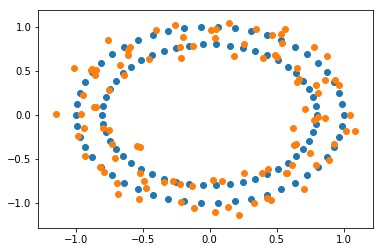

In [4]:
plt.scatter(data_clean[:,0], data_clean[:,1], label="clean data")
plt.scatter(data_noisy[:,0], data_noisy[:,1], label="noisy data")

## Generate $H_1$ diagrams for each of the data sets

In [5]:
dgm_clean = ripser.ripser(data_clean)['dgms'][1]
dgm_noisy = ripser.ripser(data_noisy)['dgms'][1]

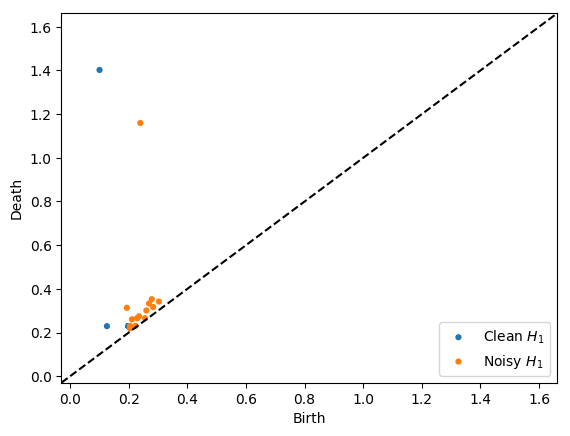

In [6]:
ripser.plot_dgms([dgm_clean, dgm_noisy] , labels=['Clean $H_1$', 'Noisy $H_1$'])

## Compute and visualize Bottleneck distance

The `bottleneck` function has the option of returning the matching when the parameter `matching` is set to `True`. With the returned data, we can use the `plot.bottleneck_matching` function to visualize which persistence points contributed to the distance.

In [7]:
distance_bottleneck, (matching, D) = persim.bottleneck(dgm_clean, dgm_noisy, matching=True)

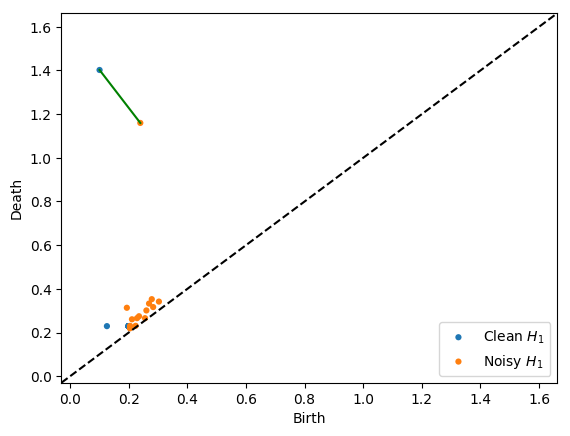

In [11]:
persim.plot.bottleneck_matching(dgm_clean, dgm_noisy, matching, D, labels=['Clean $H_1$', 'Noisy $H_1$'])

The default option of `matching=False` will return just the distance if that is all you're interested in.

In [12]:
persim.bottleneck(dgm_clean, dgm_noisy)

0.24245107173919678

## Sliced Wasserstein distance


Sliced Wasserstein Kernels for persistence diagrams were introduced by [Carriere et al, 2017](https://arxiv.org/abs/1706.03358) and implemented by Alice Patania.

In [14]:
persim.sliced_wasserstein(dgm_clean, dgm_noisy)

1.034281047579809

## Heat Kernel Distance

We also implement the heat kernel distance

In [15]:
persim.heat(dgm_clean, dgm_noisy)

0.28431455128208605

The parameter `sigma` controls ...

In [17]:
persim.heat(dgm_clean, dgm_noisy, sigma=0.1), persim.heat(dgm_clean, dgm_noisy, sigma=1), persim.heat(dgm_clean, dgm_noisy, sigma=10)

(0.9452992394565936, 0.12581612617123678, 0.013535132715043233)